

# Investigation about movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this project we will invistgate about three questions:
1- what is the relation between budget and revenue?
2- what the relation between popularity and vote?
3- what year have the most budget?

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
we will discover the data and choose the most usefull coloumn for our investigate

### General Properties

In [54]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [55]:
df.shape

(10866, 21)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

* To take a look of th data

In [57]:
df.drop(['homepage','imdb_id','tagline','keywords','overview', 'release_date'], axis=1 , inplace=True)

*  all of these columns are not usefull to invistgate 

In [58]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


* *this the data set after the dropping* 



### Dealing with missing values
* as we can see, there is a missing values in (cast , director , production_companies and genres) 

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


because all of the null data are not numric, we will drop it so we can have a clean data

In [60]:
df.dropna(inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [61]:
len(df.query("revenue <1")) , len(df.query("budget<1"))

(5022, 4751)

* If we look at the budget and revenue columns, we will find some zero values over there which are erroneous and will adversely affect the overall analysis. So we will get rid of them.

In [62]:
zeroRev = df[ df['revenue'] < 1 ]
df.drop(zeroRev.index, axis=0 , inplace = True)

* checking if the clearing is done

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 15 columns):
id                      3806 non-null int64
popularity              3806 non-null float64
budget                  3806 non-null int64
revenue                 3806 non-null int64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 475.8+ KB


In [67]:
zeroBud = df[ df['budget'] < 1 ]
df.drop(zeroBud.index, axis=0 , inplace = True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 15 columns):
id                      3806 non-null int64
popularity              3806 non-null float64
budget                  3806 non-null int64
revenue                 3806 non-null int64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 475.8+ KB


###  now we will check if our wrangling is in best case 

In [69]:
len(df.query("revenue <1")) , len(df.query("budget<1"))

(0, 0)

* it seems like we get rid of all zero value!

<a id='eda'></a>
## Exploratory Data Analysis



### 1- Does the most of the movies higher than the mean of revenue or less?

In [85]:
df.revenue.mean()

108945014.0641093

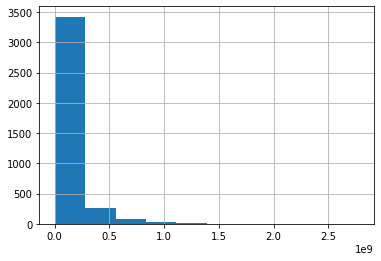

In [90]:
df['revenue'].hist()

* Here, we see most of the movies revenue are between 10,000,000 and 50,000,000 where the mean is 108945014.0641093. That is lead to the most of the movies revenue are under the mean.

### 2- what the relation between popularity and vote?

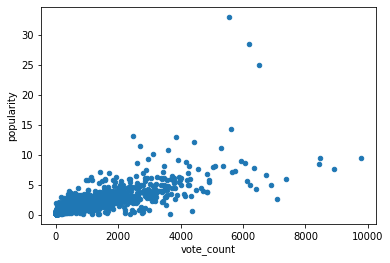

In [99]:
df.plot(x = "vote_count",y = 'popularity', kind="scatter")

* *Here we can see in the graph, there is a postive relation between vote and popularity. when votes increased that is mean it will be more popular*

## 3- what year have the most budget?

In [101]:
df.groupby("release_year")['budget'].mean().reset_index().sort_values('budget', ascending=False)

,release_year,budget
52,2012,4.831281e+07
53,2013,4.783756e+07
50,2010,4.767494e+07
44,2004,4.681161e+07
40,2000,4.638654e+07
43,2003,4.591601e+07
55,2015,4.481736e+07
54,2014,4.481072e+07
37,1997,4.475874e+07
49,2009,4.427822e+07


* *here I grouped the release year with the budget and I sort it by the hieghest budget so I can see the result clearly*

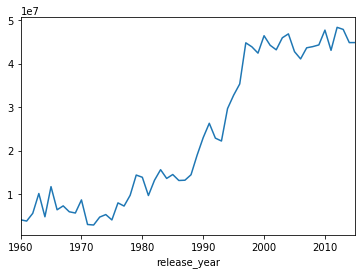

In [102]:
df.groupby("release_year")['budget'].mean().plot()

* As we can see, the budget is increases year by year. ther is a trend value in 2004 and then it start to decreased again but then it start to increased again where the most year of budget is 2013 

<a id='conclusions'></a>
## Conclusions



In the first, we can see that revenues has extreme values and that is why most of the movie's revenue below the average.

Secondly, when the movie get a higher popularity it will get it more voting, although the extreme value is near to 6000 voting.

Finally, the years where had the most budget is between 2010 and 2015. We see in the graph that year by year budget has increased, but when we see after 2004 it has been decreased. I assume that because the dataset dosen't have enuogh movies in 2015 like in 2004.

In the end, I have a limitation is when I want to study the relation between voting and MPAA rating and which is have the most voting but it is not avilable in this dataset. Moreover, there is alot of missing values and erroneous values of budget and revenue that effect my study.
